# Clustering and Dimensionality Reduction

Instructions Link: 
https://github.com/dpuelz/STA380/tree/master/exercises

### Overall Summary of Findings: (please scroll down for plots and captions)

#### PCA 
* There was no column specifying which wines were high or low quality, so I decided this based on percentiles. I used the 50th percentile value of 'quality' as a cutoff - wines with a quality rating of 6.0 or higher were classified as high quality, and anything lower than that was considered low quality.  
* Overall Process for PCA: I first checked how much variance was explained by 2 principal components, which was around 50.2%. I then tried with 11 principal components just to visualize the diminishing returns of adding more components. I decided to stick with 3 principal components as it is not too hard to visualize and also explains 64.4% of the variance. 
* PCA: PCA does a good job of identifying red wines (red in the plots below) vs. white wines (pink in the plots below). Those two clusters are clearly separate, with a small amount of overlap. However, it does a poor job of identifying high quality vs. low quality wines. As you can see, the high and low quality wines are completely overlapping. 
* Comparing the values of the chemical indicators between high quality and low quality wines shows not much difference (compared to the standard deviation for each chemical column, the difference between high and low quality wines was close to or less than 1SD). This indicates that perhaps the chemical values are not good predictors of wine quality ratings, and is possibly why PCA did not give good results.

#### t-SNE 
* Like PCA, tSNE does a good job of identifying the red vs. white wines (see plot) but not a good job for the high vs. low quality wines. There's a lot of overlap in the quality plot, but not much in the color plot.
* I played around with the perplexity parameter and tried selecting it with a graph showing the KL Divergence vs. perplexity value, which can be seen below.

#### K-Means++ Clustering 
* I used K-Means ++ because it initializes the clusters better than a standard/normal K-Means model.
* In terms of accuracy, PCA performed better than t-SNE for both wine color (98% accuracy) and quality (62% accuracy). However, neither of them performs really well for wine quality as you can tell by the accuracy value.
* For predicting/distinguishing wine color, I would select PCA. For wine quality, I would select neither, due to the poor accuracy. 

## Set Up - If running, please executing these cells first

In [219]:
from pandas import Series, DataFrame
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import plotly.express as px  #for interactive visualizations
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder


In [127]:
df = pd.read_csv('/Users/vishwapatel/Desktop/STA 380 - Intro to ML/Part 2 Unsupervised Learning Class/wine.csv')
df[:5]

#quality and color are to be left out. 
#see if unsupervised learning methods accurately separate high quality vs. low quality wines, and red vs. white wines.

#methods to try - PCA, tSNE, any clustering algorithm of choice 

,fixed.acidity,volatile.acidity,citric.acid,residual.sugar,chlorides,free.sulfur.dioxide,total.sulfur.dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


count    6497.000000
mean        5.818378
std         0.873255
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         9.000000
Name: quality, dtype: float64

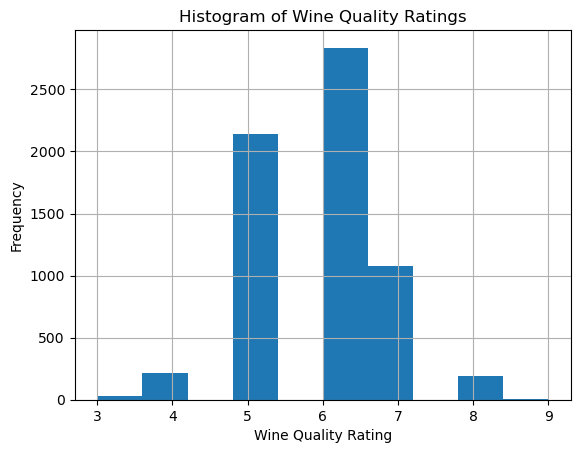

In [129]:
#setting high vs. low quality level - the quality values range from 3 - 6. The 50% percentile is 6 and 
#the mean is 5.82. I considered a rating of 6 to be the cutoff for high vs. low quality wines. 

df['high quality'] = (df['quality'] >= 6)
df['quality'].hist()
plt.title('Histogram of Wine Quality Ratings')
plt.xlabel('Wine Quality Rating')
plt.ylabel('Frequency')
df['quality'].describe()


As we can see, there are only a few unique values of quality and not really a normal distribution. 
I used 6 as the initial threshold for high vs. low quality since that was the median (and the mean was very close, at 5.81).

## PCA Set Up

In [131]:
#getting the x values
X = df.iloc[:, 0:11].values

sc = StandardScaler()
X_sc = sc.fit_transform(X)

### Checking How Much Variance is Explained with Up To 11 Principal Components

Total Variance Explained with 11 PCs:  0.9999999999999999


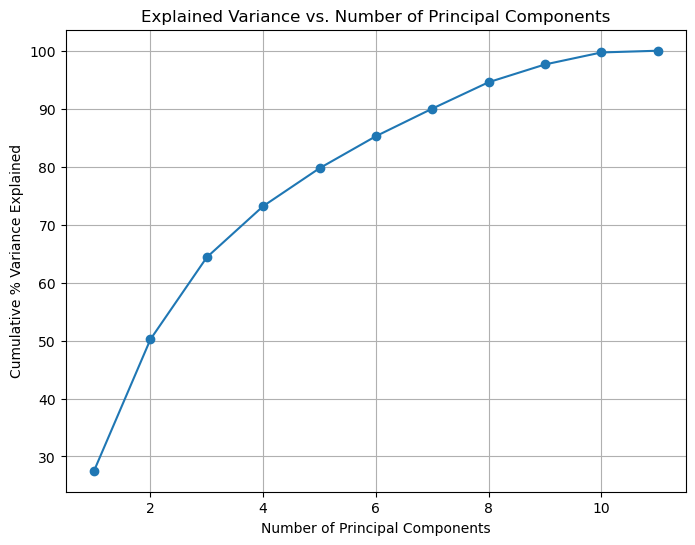

In [145]:
#50% of variance explained in 2 PCs. Trying more PCs to see how much improvement we can get
pca_more = PCA(n_components = 11)

X_pca_more = pca_more.fit_transform(X_sc)

loadings_more = pca_more.components_

# Create a DataFrame for better interpretation
loading_df_more = pd.DataFrame(loadings_more.T, columns=['PC1', 'PC2','PC3', 'PC4', 'PC5','PC6', 'PC7','PC8', 'PC9', 'PC10', 'PC11'], index=df.columns[:11])
explained_variance_more = pca_more.explained_variance_ratio_
print("Total Variance Explained with 11 PCs: ", explained_variance_more.sum())

# Calculate the cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_more) * 100  # Convert to percentage

# Number of principal components (1, 2, 3, ..., 11)
num_components = np.arange(1, len(explained_variance_more) + 1)
plt.figure(figsize=(8, 6))
plt.plot(num_components, cumulative_explained_variance, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative % Variance Explained')
plt.title('Explained Variance vs. Number of Principal Components')
plt.grid(True)
plt.show()

In [152]:
pc_index = ['PC1', 'PC2','PC3', 'PC4', 'PC5','PC6', 'PC7','PC8', 'PC9', 'PC10', 'PC11']

explained_variance_df = pd.DataFrame(explained_variance_more, columns=['Explained Variance'], index = pc_index)
explained_variance_df['Cumulative Explained Variance'] = explained_variance_df['Explained Variance'].cumsum()

print('Cumulative Explained Variance with Each Added Principal Component')
explained_variance_df

Cumulative Explained Variance with Each Added Principal Component


,Explained Variance,Cumulative Explained Variance
PC1,0.275443,0.275443
PC2,0.226711,0.502154
PC3,0.141486,0.643640
PC4,0.088232,0.731872
PC5,0.065443,0.797315
PC6,0.055210,0.852525
PC7,0.047560,0.900085
PC8,0.045592,0.945677
PC9,0.030639,0.976316
PC10,0.020700,0.997015


### Visualizing the Importance of Each Feature in the First 3 Principal Components 
For principal component 1, free and total sulfur dioxide, residual sugar, volatile acidity, and chlorides are the most heavily weighted features. 

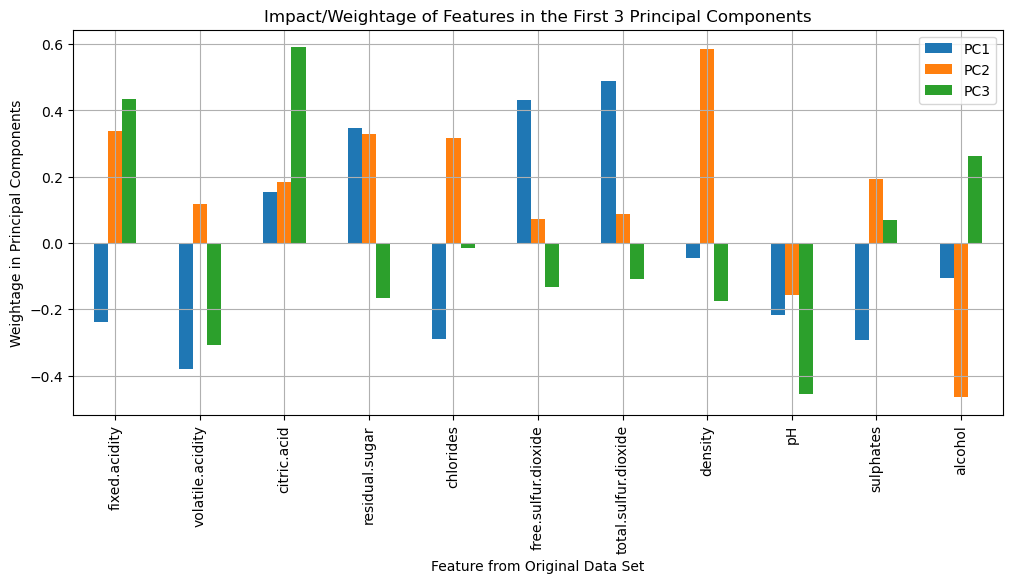

In [192]:
loading_df_more[['PC1','PC2','PC3']].plot(kind='bar', figsize = (12,5))
plt.title('Impact/Weightage of Features in the First 3 Principal Components')
plt.xlabel('Feature from Original Data Set')
plt.ylabel('Weightage in Principal Components')
plt.grid(True)

### Stick with 3 Principal Components for Remaining Analysis

I chose to stick with 3 principal components because I felt that it could be easily visualized and interpreted, but still covers a large chuck of the variance (64%). Additionally, I tried using only 2 principal components and when increasing to 3, there was very minimal improvement. Since each principal component adds less and less improvement, I felt there was not a practical need to add more. 

In [154]:
#going to stick with 3 principal components as it covers more than half the variance
pca_more = PCA(n_components = 3)

X_pca_more = pca_more.fit_transform(X_sc)

loadings_more = pca_more.components_

# Create a DataFrame for better interpretation
loading_df_more = pd.DataFrame(loadings_more.T, columns=['PC1', 'PC2','PC3'], index=df.columns[:11])
explained_variance_more = pca_more.explained_variance_ratio_

### Wine Color PCA Scatterplot with PC 1 and PC 2 
As you can see in the plot below, just 2 principal components do a good job of separating the red and white wines. 

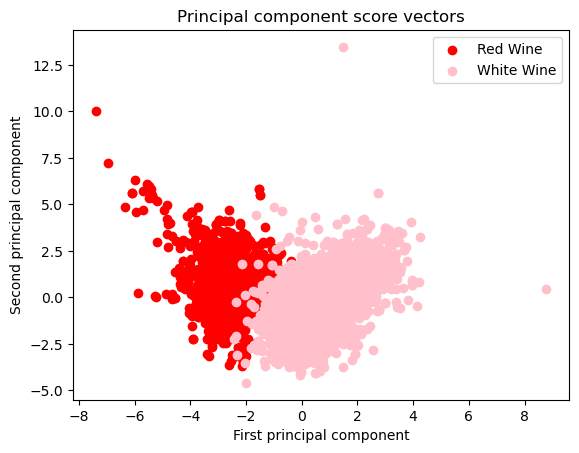

In [159]:
y = df.iloc[:, 12].values

plt.figure()
colors = ['red', 'pink']
labels = ['Red Wine', 'White Wine']


for color, label, i in zip(colors, labels, ['red','white']):
    plt.scatter(X_pca[y==i, 0], X_pca[y==i, 1], color=color, label = label)
plt.title('Principal component score vectors')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.legend()

### Wine Quality PCA Scatterplot with PC1 and PC2
Not great separation between the high and low quality wines. Since the first two principal components explained 50% of the variance and the 3rd only adds about 14%, it's unlikely to yield much improvement here. 

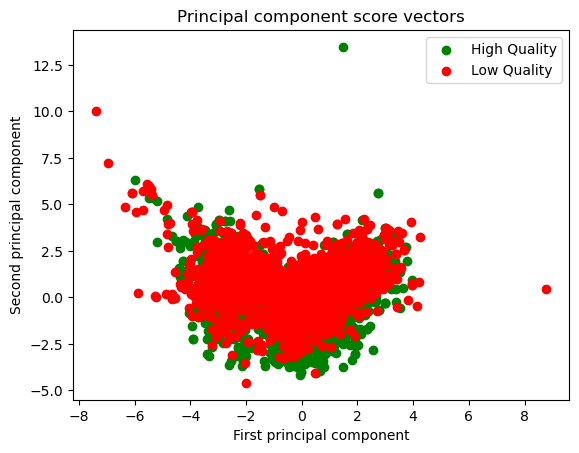

In [224]:
#repeat for the wine quality (high vs low quality)
y = df.iloc[:, 13].values

plt.figure()
colors = ['green', 'red']
labels = ['High Quality', 'Low Quality']


for color, label, i in zip(colors, labels, [True,False]):
    plt.scatter(X_pca[y==i, 0], X_pca[y==i, 1], color=color, label=label)
plt.title('Principal component score vectors')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.legend()


### Wine Color PCA Scatterplot with 3 Principal Components
You can see clear separation between the red and white wines. This didn't yield much improvement over the 2 PC analysis. 

/var/folders/22/q2j3xwyd63q79r8qlb0118_h0000gn/T/ipykernel_38566/1144286790.py:8: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_pca_more[:, 0], X_pca_more[:, 1], X_pca_more[:, 2], c=y_color, cmap='coolwarm')


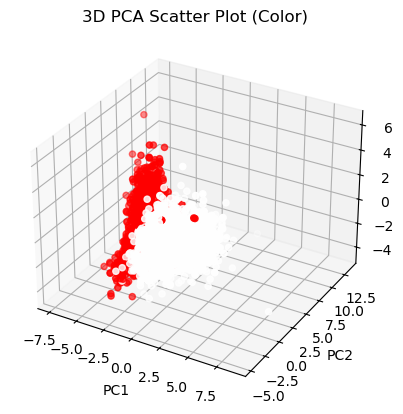

In [162]:
from mpl_toolkits.mplot3d import Axes3D
y_high_quality = df['high quality']  # Target variable for quality
y_color = df['color']  # Target variable for color
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# For wine color
ax.scatter(X_pca_more[:, 0], X_pca_more[:, 1], X_pca_more[:, 2], c=y_color, cmap='coolwarm')
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Scatter Plot (Color)')
plt.show()

### Wine Quality PCA Scatterplot with 3 Principal Components
As expected, this still doesn't perform well and there's a lot of overlap between the high and low quality wines. 

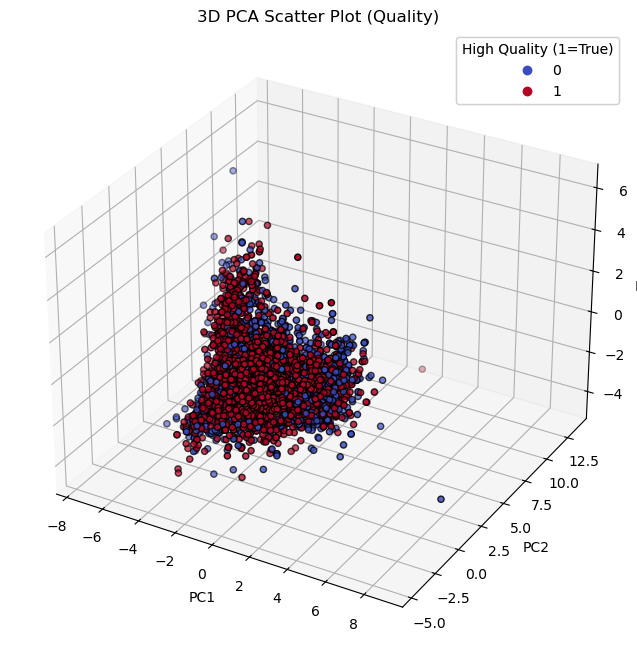

In [163]:
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot points in the 3D space, coloring by quality
scatter = ax.scatter(X_pca_more[:, 0], X_pca_more[:, 1], X_pca_more[:, 2], c=y_high_quality, cmap='coolwarm', edgecolor='k')

# Set labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Scatter Plot (Quality)')

# Create a legend
legend = ax.legend(*scatter.legend_elements(), title="High Quality (1=True)")
ax.add_artist(legend)

# Show plot
plt.show()

### Visualizing 3 PC Analysis on 2D Axis for Wine Quality
Still lots of overlap here. The 3rd principal component doesn't improve the separation of high vs. low quality wines. 

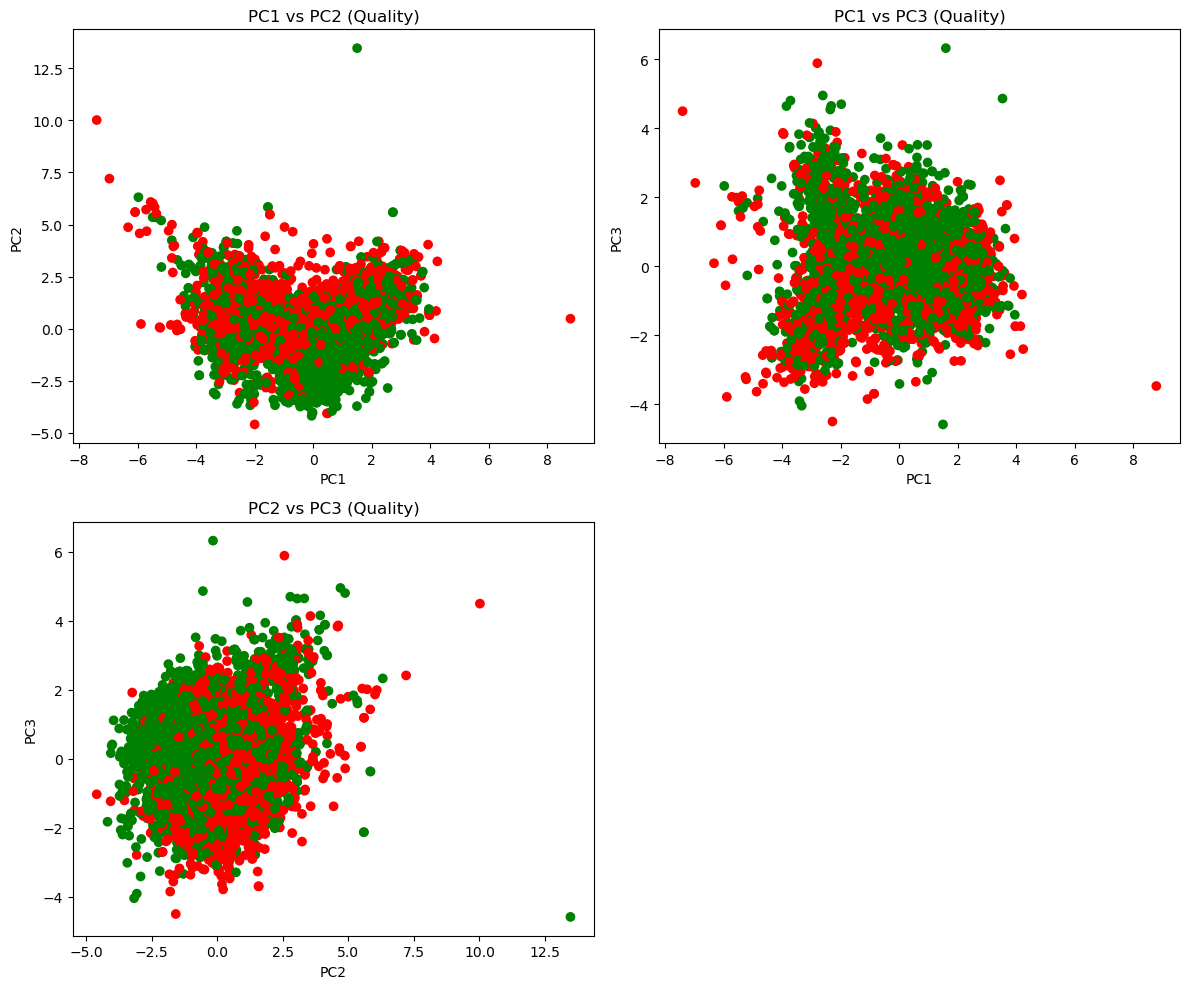

In [122]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming you have computed X_pca_more with n_components=5
X_pca_more = pca_more.fit_transform(X_sc)

# y is the wine color label (red/white)
y_color = df.iloc[:, 13].values  # Color (red/white)

# Map wine colors to red and pink
color_map = {True: 'green', False: 'red'}
colors = np.array([color_map[color] for color in y_color])

# Pairwise scatter plots for wine color
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.scatter(X_pca_more[:, 0], X_pca_more[:, 1], c=colors, label='Color')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PC1 vs PC2 (Quality)')

plt.subplot(2, 2, 2)
plt.scatter(X_pca_more[:, 0], X_pca_more[:, 2], c=colors, label='Color')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title('PC1 vs PC3 (Quality)')

plt.subplot(2, 2, 3)
plt.scatter(X_pca_more[:, 1], X_pca_more[:, 2], c=colors, label='Color')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title('PC2 vs PC3 (Quality)')

plt.tight_layout()
plt.show()


\
\
\
\
\
\
\
\
\


### tSNE 

### Trying to Find the Optimal Perplexity Value 

In [ ]:
#getting the x values
X = df.iloc[:, 0:11].values

sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [190]:
#code for this loop used from DataCamp - https://www.datacamp.com/tutorial/introduction-t-sne

import numpy as np

perplexity = np.arange(5, 55, 5)
divergence = []

for i in perplexity:
    model = TSNE(n_components=2, init="pca", perplexity=i)
    reduced = model.fit_transform(X_sc)
    divergence.append(model.kl_divergence_)


Text(0, 0.5, 'KL Divergence')

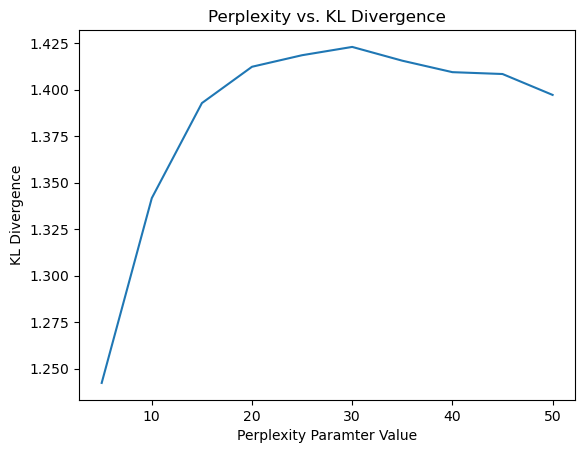

In [193]:
plt.plot(perplexity, divergence)
plt.title('Perplexity vs. KL Divergence')
plt.xlabel('Perplexity Paramter Value')
plt.ylabel('KL Divergence')

/opt/anaconda3/envs/myenv/lib/python3.12/site-packages/sklearn/manifold/_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



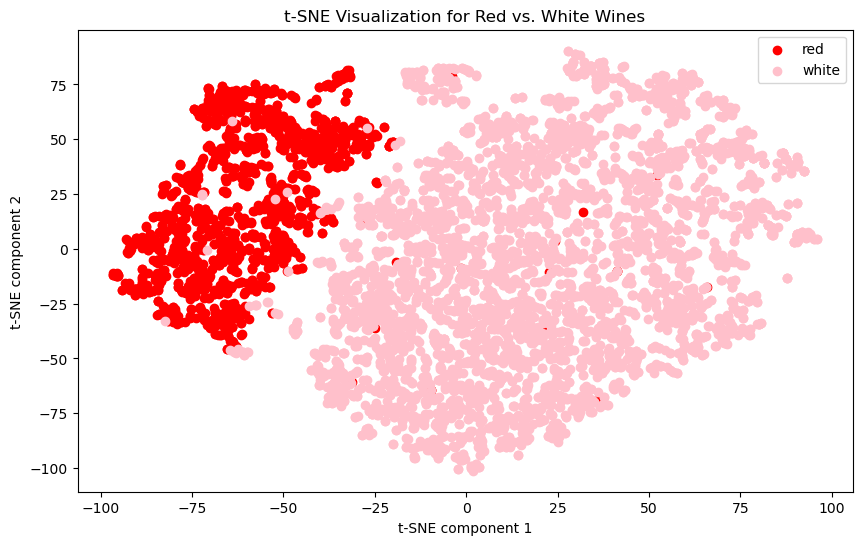

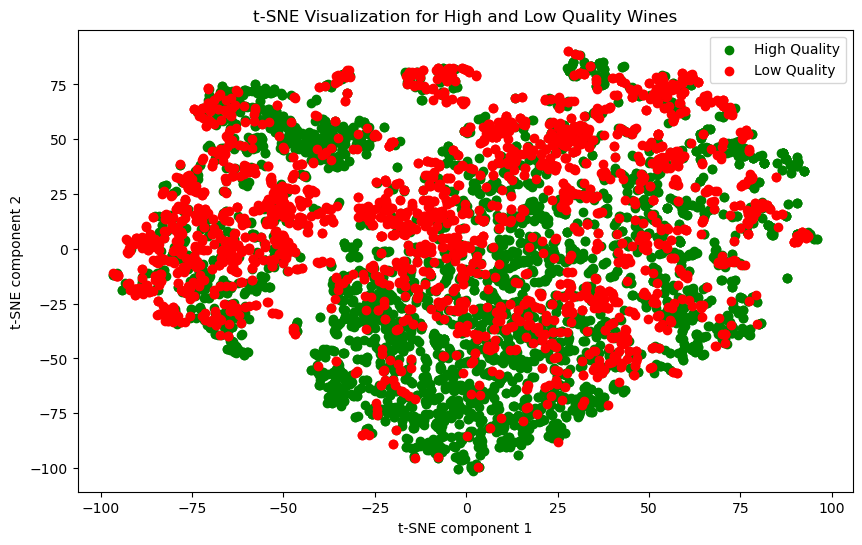

In [195]:
tsne = TSNE(n_components=2, perplexity = 20, random_state=42, n_iter=1000)
X_tsne = tsne.fit_transform(X_sc)

#visualize the t-SNE scatterplot for wine color
plt.figure(figsize=(10, 6))
colors = {'red': 'red', 'white': 'pink'}  # Assign colors based on wine color

for color in colors.keys():
    plt.scatter(X_tsne[df['color'] == color, 0], X_tsne[df['color'] == color, 1], label=color, color=colors[color])

plt.title('t-SNE Visualization for Red vs. White Wines')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.legend()
plt.show()

#visualize the t-SNE scatterplot for quality level
q_colors = {True: 'green', False: 'red'}

plt.figure(figsize=(10, 6))
for quality in [True, False]:
    plt.scatter(X_tsne[df['high quality'] == quality, 0], 
                X_tsne[df['high quality'] == quality, 1], 
                color=q_colors[quality],  # Fix here: use 'quality' to index q_colors
                label='High Quality' if quality else 'Low Quality')

plt.title('t-SNE Visualization for High and Low Quality Wines')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')
plt.legend()
plt.show()

\
\
\
\
\
\
\
\
\
\
\


### K-means Clustering

In [221]:
kmeans_tsne = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans_tsne.fit(X_tsne)

# Fit K-Means++ on the PCA transformed data
kmeans_pca = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans_pca.fit(X_pca_more)

# Get the cluster labels for both t-SNE and PCA transformed data
labels_tsne = kmeans_tsne.labels_
labels_pca = kmeans_pca.labels_

# Optionally, you can add the cluster labels back to your original DataFrame
df['Cluster_tSNE'] = labels_tsne
df['Cluster_PCA'] = labels_pca

# Print out the cluster centers for both models
print("Cluster centers for t-SNE transformed data:")
print(kmeans_tsne.cluster_centers_)

print("\nCluster centers for PCA transformed data:")
print(kmeans_pca.cluster_centers_)

Cluster centers for t-SNE transformed data:
[[-29.525764 -15.419843]
 [ 39.81202   21.097332]]

Cluster centers for PCA transformed data:
[[-2.48467721  0.78622352 -0.21382853]
 [ 0.85064259 -0.26916785  0.07320535]]


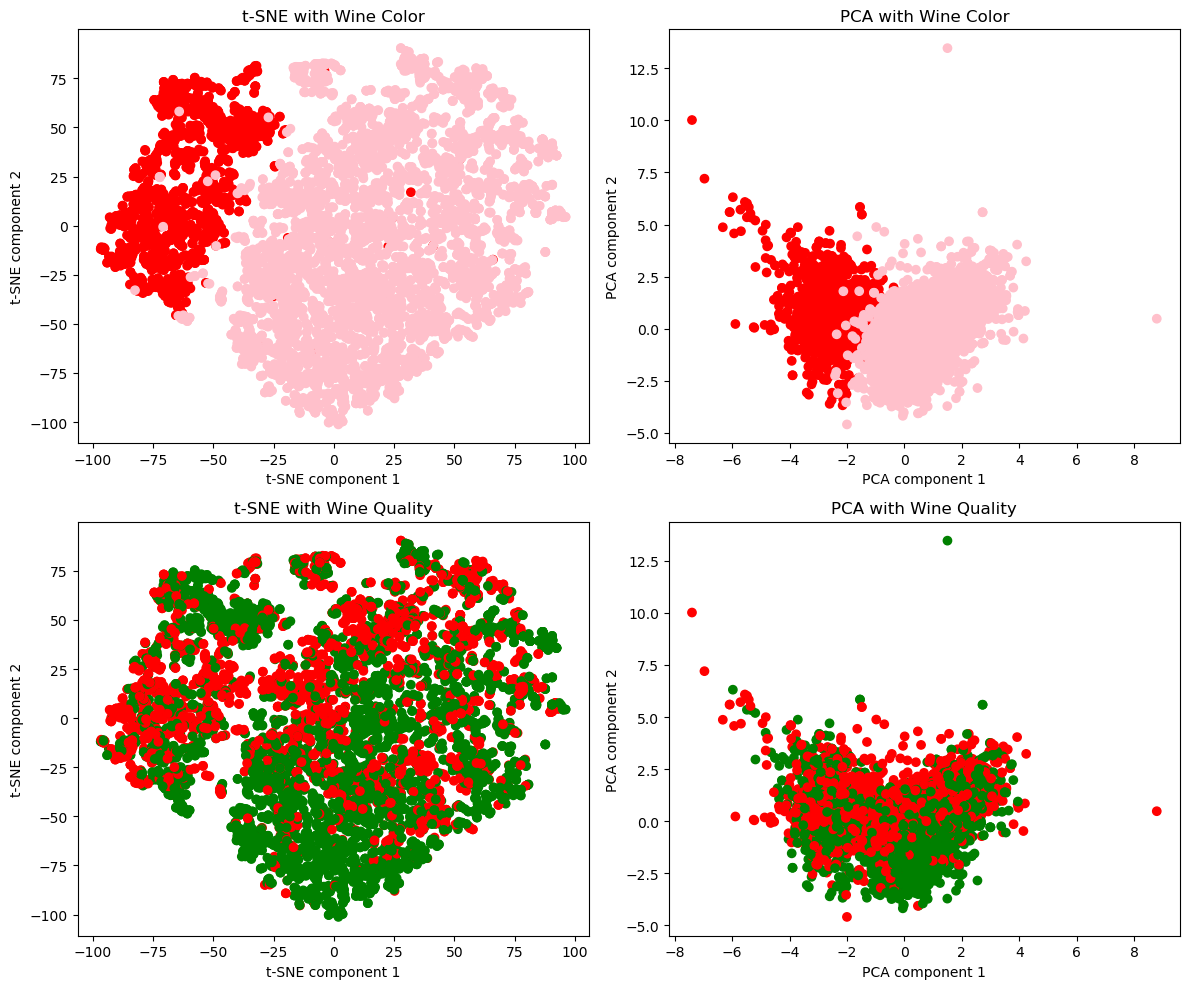

In [223]:
# Define color maps
color_map_wine = {'red': 'red', 'white': 'pink'}
color_map_quality = {True: 'green', False: 'red'}

# Map the color arrays
colors_wine = np.array([color_map_wine[color] for color in y_color])
colors_quality = np.array([color_map_quality[quality] for quality in y_quality])

# Wine color visualization
plt.figure(figsize=(12, 10))

plt.subplot(2, 2, 1)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors_wine, marker='o')
plt.title('t-SNE with Wine Color')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')

plt.subplot(2, 2, 2)
plt.scatter(X_pca_more[:, 0], X_pca_more[:, 1], c=colors_wine, marker='o')
plt.title('PCA with Wine Color')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')

# Wine quality visualization
plt.subplot(2, 2, 3)
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=colors_quality, marker='o')
plt.title('t-SNE with Wine Quality')
plt.xlabel('t-SNE component 1')
plt.ylabel('t-SNE component 2')

plt.subplot(2, 2, 4)
plt.scatter(X_pca_more[:, 0], X_pca_more[:, 1], c=colors_quality, marker='o')
plt.title('PCA with Wine Quality')
plt.xlabel('PCA component 1')
plt.ylabel('PCA component 2')

plt.tight_layout()
plt.show()

In [218]:
# Encode the wine color labels (red/white) as numerical labels (0/1)
label_encoder_color = LabelEncoder()
y_color_encoded = label_encoder_color.fit_transform(y_color)

#K-Means on t-SNE transformed data
clusters_tsne_color = kmeans_tsne.fit_predict(X_tsne)

#K-Means on PCA transformed data
clusters_pca_color = kmeans_pca.fit_predict(X_pca_more)

# Function to adjust cluster labels to match the actual labels
def adjust_labels(cluster_labels, actual_labels):
    if accuracy_score(cluster_labels, actual_labels) < 0.5:
        return 1 - cluster_labels  # Flip the cluster labels if accuracy is less than 0.5
    return cluster_labels

# Adjust labels for wine color
clusters_tsne_color_adjusted = adjust_labels(clusters_tsne_color, y_color_encoded)
clusters_pca_color_adjusted = adjust_labels(clusters_pca_color, y_color_encoded)

# Calculate accuracy for wine color
accuracy_tsne_color = accuracy_score(y_color_encoded, clusters_tsne_color_adjusted)
accuracy_pca_color = accuracy_score(y_color_encoded, clusters_pca_color_adjusted)

# Now, calculate accuracy for wine quality (high/low)
clusters_tsne_quality = kmeans_tsne.fit_predict(X_tsne)
clusters_pca_quality = kmeans_pca.fit_predict(X_pca_more)

# Encode the wine quality labels (True/False) as numerical labels (0/1)
label_encoder_quality = LabelEncoder()
y_quality_encoded = label_encoder_quality.fit_transform(y_quality)

# Adjust labels for wine quality
clusters_tsne_quality_adjusted = adjust_labels(clusters_tsne_quality, y_quality_encoded)
clusters_pca_quality_adjusted = adjust_labels(clusters_pca_quality, y_quality_encoded)

# Calculate accuracy for wine quality
accuracy_tsne_quality = accuracy_score(y_quality_encoded, clusters_tsne_quality_adjusted)
accuracy_pca_quality = accuracy_score(y_quality_encoded, clusters_pca_quality_adjusted)

# Print the results
print(f"Accuracy of t-SNE for predicting wine color: {accuracy_tsne_color:.2f}")
print(f"Accuracy of PCA for predicting wine color: {accuracy_pca_color:.2f}")

print(f"Accuracy of t-SNE for predicting wine quality: {accuracy_tsne_quality:.2f}")
print(f"Accuracy of PCA for predicting wine quality: {accuracy_pca_quality:.2f}")


Accuracy of t-SNE for predicting wine color: 0.66
Accuracy of PCA for predicting wine color: 0.98
Accuracy of t-SNE for predicting wine quality: 0.56
Accuracy of PCA for predicting wine quality: 0.62


PCA is far more accurate for predicting both wine color and quality. 
Its accuracy is 98% for wine color! However, although PCA does a better job at predicting wine quality than tSNE does, neither of them is very high performing. We cannot properly predict wine quality with meaningful accuracy using these techniques.  

### Retrying the Analysis with Different Wine Quality Thresholds
Since the results for wine quality clusters were so poor, let's try redoing it with a different threshold to see if anything changes. 

I am doing it with PCA only since we already saw that PCA outperforms tSNE in terms of accuracy. 

#### Threshold for high quality = Rating of 7 or higher

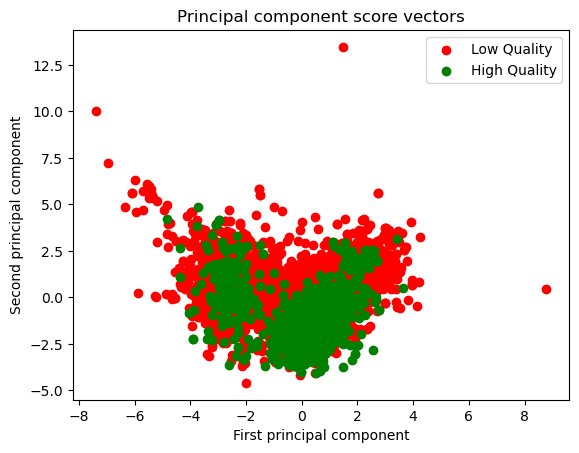

In [232]:
df['high quality'] = (df['quality'] >= 7)

#getting the x values
X = df.iloc[:, 0:11].values

sc = StandardScaler()
X_sc = sc.fit_transform(X)

#going to stick with 3 principal components as it covers more than half the variance
pca_more = PCA(n_components = 3)

X_pca_more = pca_more.fit_transform(X_sc)

loadings_more = pca_more.components_

# Create a DataFrame for better interpretation
loading_df_more = pd.DataFrame(loadings_more.T, columns=['PC1', 'PC2','PC3'], index=df.columns[:11])
explained_variance_more = pca_more.explained_variance_ratio_

#repeat for the wine quality (high vs low quality)
y = df.iloc[:, 13].values

plt.figure()
colors = ['red', 'green']  # Reversed the order so that 'Low Quality' is drawn first
labels = ['Low Quality', 'High Quality']
zorders = [1, 2]  # Low Quality (red) has a lower zorder, High Quality (green) has a higher zorder

for color, label, i, z in zip(colors, labels, [False, True], zorders):
    plt.scatter(X_pca_more[y==i, 0], X_pca_more[y==i, 1], color=color, label=label, zorder=z)

plt.title('Principal component score vectors')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.legend()
plt.show()

There is a marginal improvement using the threshold of 7 or higher as "High Quality". However, still lots of overlapping. 

#### Threshold for high quality = Rating of 5 or higher

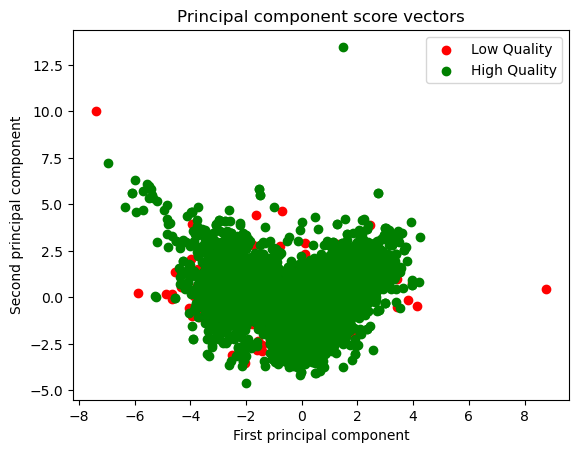

In [235]:
df['high quality'] = (df['quality'] >= 5)
y = df.iloc[:, 13].values


plt.figure()
colors = ['red', 'green']  # Reversed the order so that 'Low Quality' is drawn first
labels = ['Low Quality', 'High Quality']
zorders = [1, 2]  # Low Quality (red) has a lower zorder, High Quality (green) has a higher zorder

for color, label, i, z in zip(colors, labels, [False, True], zorders):
    plt.scatter(X_pca_more[y==i, 0], X_pca_more[y==i, 1], color=color, label=label, zorder=z)

plt.title('Principal component score vectors')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
plt.legend()
plt.show()



This plot is worse than the original one with threshold = 6. It is safe to say that quality=5 should not be used as a threshold for high vs. low quality wines. 